In [2]:
import pandas as pd
import numpy as np 
import seaborn  as sns
import matplotlib.pyplot as plt

%matplotlib inline 
sns.set('notebook')


![](https://s.dou.ua/storage-files/image4_G3msWXQ.png)

![](https://miro.medium.com/max/958/1*-oVnNlSFTUxvpJ42VIVpRw.jpeg)

![Типы машинного обучение](https://cdn-clekk.nitrocdn.com/tkvYXMZryjYrSVhxKeFTeXElceKUYHeV/assets/static/optimized/rev-47f0b0a/wp-content/uploads/2021/05/machine-learning-types-infographics_1.png)

### Знакомство с Scikit-Learning
> scikit-learn – проект с открытым исходным кодом, это означает, что его можно свободно использовать и распространять, и любой человек может легко получить исходный код, чтобы увидеть, что происходит «за кулисами». 

> Проект scikit-learn постоянно развивается и совершенствуется, и у него очень активное сообщество пользователей. Он содержит ряд современных алгоритмов машинного обучения, а также полную документацию по каждому алгоритму. scikit-learn – очень популярный инструмент и самая известная питоновская библиотека для
машинного обучения. Она широко используется в промышленности и науке, а в интернете имеется богатый выбор обучающих материалов и примеров программного кода. scikit-learn прекрасно работает с рядом других научных инструментов Python.

> Понимание принципов работы и использования scikit-learn – важно, но есть несколько других библиотек, которые расширят ваш опыт. scikit-learn базируется на двух питоновских библиотеках для научных вычислений NumPy и SciPy. Помимо NumPy и SciPy мы будем использовать pandas и matplotlib. 



### Анализ 

> Здесь каждая строка данных относится к одному наблюдаемому цветку,  а количество строк - это общее количество цветков в наборе данных

> Аналогично, каждый столбец данных относится к определенной количественной/ качественной информации, которая описывает каждый образец

> В общем случае мы будем называть **столбцы матрицы фичь**, а количество столбцов - *n_features*.

### Матрица фич
> Это схема таблицы ясно показывает, что информация можно представить в виде двумерного числового массива или матрицы, которую мы будет называть *матрицей фич*.

> По традиции, эта матрица характеристик часто хранится в переменной с именем *x*.

> Матрица  фич предполагается двумерной с формой **[n_samples, n_features]**, и чаще всего содержится в массиве NumPy или Pandas DataFrame, хотя некоторые модели Scikit-learn также принимают разреженные матрицы SciPy.

> Выборки(строки) всегда относятся к отдельным объектам, описываемым набором данных. 

> Признаки(столбцы) всегда относятся к отдельным наблюдениеям, которые количественно/качественно описывают каждый образец.
Признаки обычно имеют вещественное значение, но в некоторых случаях могут быть булевыми или дискретными.

### Постановка задачи
> Предположим, что ботаник-любитель хочет классифицировать сорта ирисов, которые он собрал. Он измерил в сантиметрах некоторые характеристики ирисов: длину и ширину лепестков, а также длину и ширину чашелистиков.

> Кроме того, у него есть измерения этих же характеристик ирисов, которые ранее позволили опытному эксперту отнести их к сортам setosa, versicolor и virginica. Относительно этих ирисов ботаник-любитель уверенно может сказать, к какому сорту принадлежит каждый ирис. 

> Давайте предположим, что перечисленные сорта являются единственными сортами, которые ботаник-любитель может встретить в дикой природе.
Наша цель заключается в построении модели машинного обучения, которая сможет обучиться на основе характеристик ирисов, уже классифицированных по сортам, и затем предскажет сорт для нового цветка ириса.

> Поскольку у нас есть примеры, по которых мы уже знаем правильные сорта ириса, решаемая задача является задачей обучения с учителем. В этой задаче нам нужно спрогнозировать один из сортов ириса. Это пример задачи классификации (classification). 
> Возможные ответы (различные сорта ириса) называются классами (classes). Каждый ирис в наборе данных принадлежит к одному из трех классов, таким образом решаемая задача является задачей трехклассовой классификации.
> Ответом для отдельной точки данных (ириса) является тот или иной сорт этого цветка. Cорт, к которому принадлежит цветок (конкретная точка данных), называется меткой (label).


In [118]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [39]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [100]:
iris.shape

(150, 5)

In [40]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [102]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [101]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [41]:
iris.sample(15)

,sepal_length,sepal_width,petal_length,petal_width,species
47,4.6,3.2,1.4,0.2,setosa
20,5.4,3.4,1.7,0.2,setosa
37,4.9,3.6,1.4,0.1,setosa
101,5.8,2.7,5.1,1.9,virginica
84,5.4,3.0,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
26,5.0,3.4,1.6,0.4,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
43,5.0,3.5,1.6,0.6,setosa


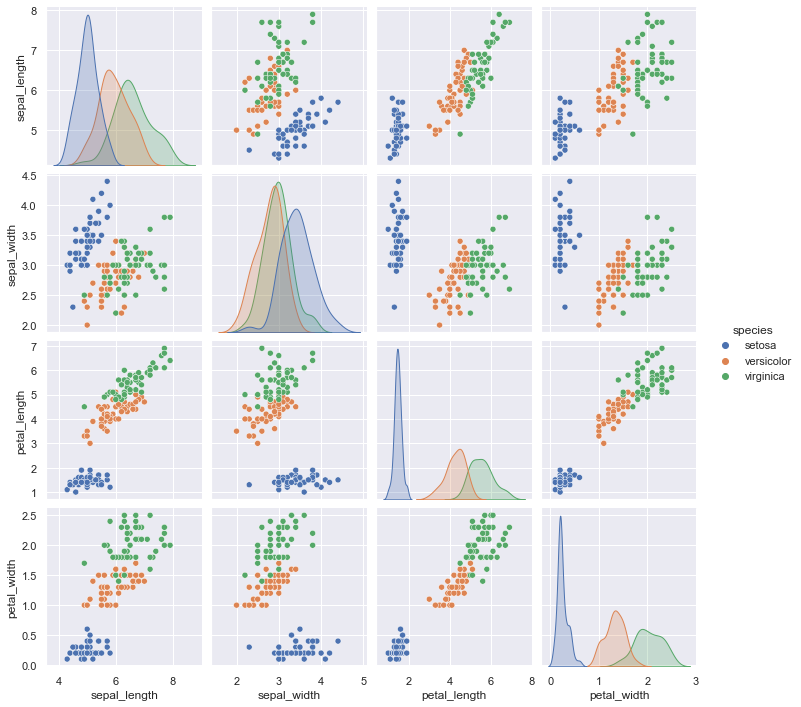

In [113]:
sns.pairplot(iris, hue = 'species');

In [30]:
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [134]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

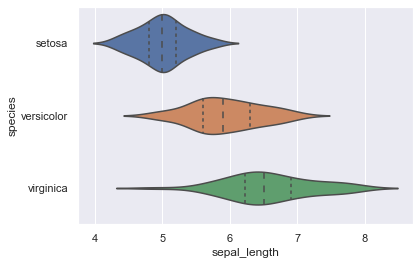

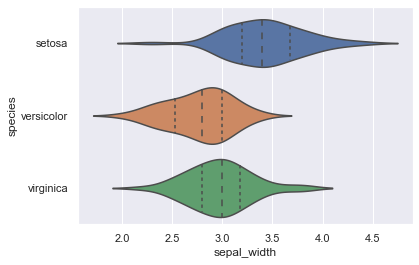

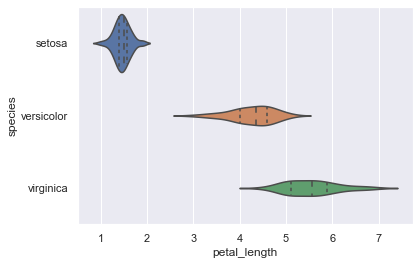

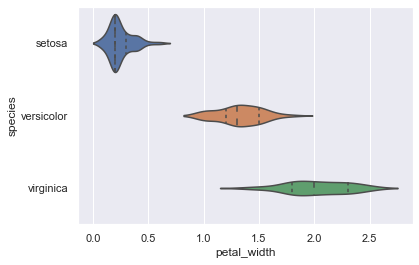

In [116]:
g = sns.violinplot(y='species', x='sepal_length', data=iris, inner='quartile')
plt.show()
g = sns.violinplot(y='species', x='sepal_width', data=iris, inner='quartile')
plt.show()
g = sns.violinplot(y='species', x='petal_length', data=iris, inner='quartile')
plt.show()
g = sns.violinplot(y='species', x= 'petal_width', data=iris, inner='quartile')
plt.show()

> На основе этих данных нам нужно построить модель машинного обучения, которая предскажет сорта ириса для нового набора измерений. Но прежде, чем мы применить нашу модель к новому набору, мы должны убедиться в том, что модель на самом деле работает и ее прогнозам можно доверять.

> К сожалению, для оценки качества модели мы не можем использовать данные, которые были взяты нами для построения модели. Это обусловлено тем, что наша модель просто запомнит весь обучающий набор и поэтому она всегда будет предсказывать правильную метку для любой точки данных в обучающем наборе. Это «запоминание» ничего не говорит нам об обобщающей способности модели (другими словами, мы не знаем, будет ли эта модель так же хорошо работать на новых данных).

> Для оценки эффективности модели, мы предъявляем ей новые размеченные данные (размеченные данные, которые она не видела раньше). Обычно это делается путем разбиения собранных размеченных данных (в данном случае 150 цветов) на две части. Одна часть данных используется для построения нашей модели машинного обучения и называется обучающими данными (training data) или обучающим набором (training set). Остальные данные будут использованы для оценки качества модели, их называют тестовыми данными (test data), тестовым набором (test set) или контрольным набором (hold-out set).

> В библиотеке scikit-learn есть функция train_test_split, которая перемешивает набор данных и разбивает его на две части. Эта функция отбирает в обучающий набор 75% строк данных с соответствующими метками. Оставшиеся 25% данных с метками объявляются тестовым набором. Вопрос о том, сколько данных отбирать в обучающий и тестовый наборы, является дискуссионным, однако использование тестового набора, содержащего 25% данных, является хорошим правилом.

> В scikit-learn данные, как правило, обозначаются заглавной X, тогда как метки обозначаются строчной у. Это навеяно стандартной математической формулой f(х)=у, где х является аргументом функции, а у – выводом. В соответствии с некоторыми математическими соглашениями мы используем заглавную X, потому что данные представляют собой двумерный массив (матрицу) и строчную у, потому что целевая переменная – это одномерный массив (вектор).

> Давайте вызовем функцию train_test_split для наших данных и зададим обучающие данные, обучающие метки, тестовые данные, тестовые метки, используя вышеупомянутые буквы:

In [52]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [120]:
from sklearn.model_selection import train_test_split 
#X_train, X_test, y_train, y_test = train_test_split(
#iris, iris['species'], random_state=0)


In [122]:
X = iris.drop(['species'], axis=1)
y = iris['species']

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


> В библиотеке scikit-learn имеется довольно много алгоритмов классификации, которые мы могли бы использовать для построения модели. В данном примере мы будем использовать классификатор на основе метода k ближайших соседей, который легко интерпретировать. 

> Построение этой модели заключается лишь в запоминании обучающего набора. Для того, чтобы сделать прогноз для новой точки данных, алгоритм находит точку в обучающем наборе, которая находится ближе всего к новой точке. 
Затем он присваивает метку, принадлежащую этой точке обучающего набора, новой точке данных.
 
> В методе k ближайших соседей означает, что вместо того, чтобы использовать лишь ближайшего соседа новой точки данных, мы в ходе обучения можем рассмотреть любое фиксированное число (k) соседей (например, рассмотреть ближайшие три или пять соседей). Тогда мы можем сделать прогноз для точки данных, используя класс, которому принадлежит большинство ее соседей. Подробнее мы поговорим об этом в главе 2, а в данный момент мы будем использовать только одного соседа.

> В scikit-learn все модели машинного обучения реализованы в собственных классах, называемых классами Estimator. Алгоритм классификации на основе метода k ближайших соседей реализован в классификаторе KNeighborsClassifier модуля neighbors. Прежде чем использовать эту модель, нам нужно создать объект-экземпляр класса. Это произойдет, когда мы зададим параметры модели. Самым важным параметром KNeighborsClassifier является количество соседей, которые мы установим равным 1:

In [56]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=1)

In [64]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


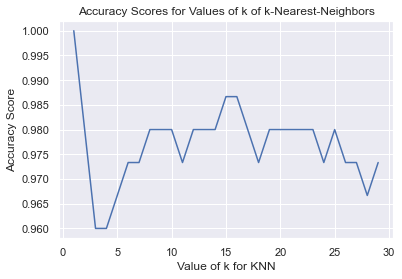

In [162]:
k_range = list(range(1,30))
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X, y)
    
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred)) 
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [154]:
knn = KNeighborsClassifier(n_neighbors = 15)

knn.fit(X_train, y_train)

knn.predict([[7.3, 3.313, 4.56, 1.45]])

/usr/local/Cellar/jupyterlab/3.4.3/libexec/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['versicolor'], dtype=object)

In [151]:
iris[iris['species'] == 'versicolor'].head(7)

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
55,5.7,2.8,4.5,1.3,versicolor
56,6.3,3.3,4.7,1.6,versicolor


In [4]:
train_df = sns.load_dataset('titanic')


In [5]:
train_df['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [6]:
train_df.groupby(['survived']).fare.sum()

survived
0    12142.7199
1    16551.2294
Name: fare, dtype: float64

In [7]:
train_df.groupby(['survived', 'class']).count()

pclass  sex  age  sibsp  parch  fare  embarked  who  \
survived class                                                         
0        First       80   80   64     80     80    80        80   80   
         Second      97   97   90     97     97    97        97   97   
         Third      372  372  270    372    372   372       372  372   
1        First      136  136  122    136    136   136       134  136   
         Second      87   87   83     87     87    87        87   87   
         Third      119  119   85    119    119   119       119  119   

                 adult_male  deck  embark_town  alive  alone  
survived class                                                
0        First           80    58           80     80     80  
         Second          97     3           97     97     97  
         Third          372     6          372    372    372  
1        First          136   117          134    136    136  
         Second          87    13           87     87     87  
         Third          119     6          119    119    119

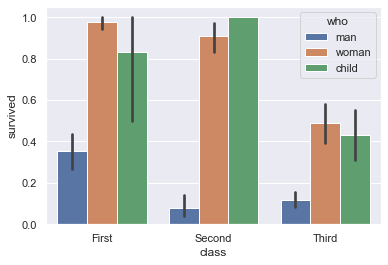

In [8]:
sns.barplot(x='class',y='survived', hue='who', data=train_df);

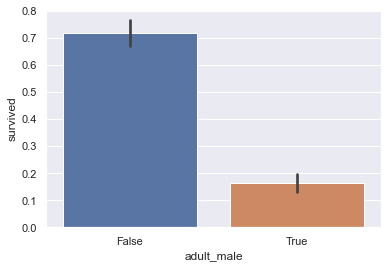

In [9]:
sns.barplot(x='adult_male',y='survived',data=train_df);

In [10]:
train_df.groupby(['class','who']).alive.count()

class   who  
First   child      6
        man      119
        woman     91
Second  child     19
        man       99
        woman     66
Third   child     58
        man      319
        woman    114
Name: alive, dtype: int64

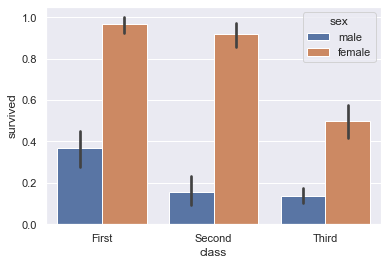

In [12]:
sns.barplot(x='class',y='survived', hue='sex', data=train_df);

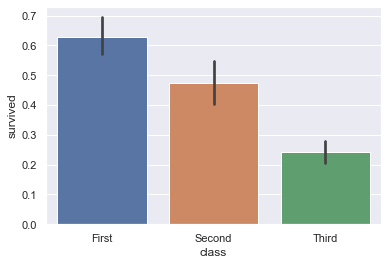

In [13]:
sns.barplot(x='class',y='survived',data=train_df);

In [15]:
train_df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [168]:
train_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [169]:
train_df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [170]:
train_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [196]:
train_df.describe(include='O')

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


In [207]:
train_df.isnull().sum()/ len(train_df) *100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

/usr/local/Cellar/jupyterlab/3.4.3/libexec/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


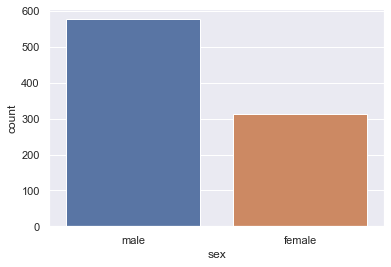

In [16]:
sns.countplot('sex',data= train_df)
train_df['sex'].value_counts();

,sex,survived
0,female,0.742038
1,male,0.188908


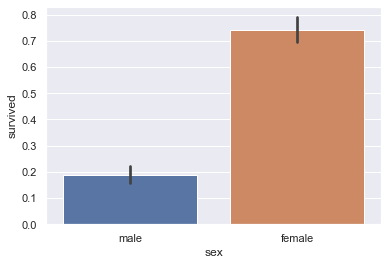

In [17]:
sns.barplot(x='sex',y='survived',data=train_df)
train_df.groupby('sex',as_index=False).survived.mean()

In [29]:
train_df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [27]:
women = train_df.loc[train_df['sex'] == 'female']["survived"]
rate_women = sum(women)/len(women)

male = train_df.loc[train_df['sex'] == 'male']["survived"]
rate_male = sum(male)/len(male)


print(f"Survived women :{rate_women}")
print(f'Survived male: {rate_male}')

Survived women :0.7420382165605095
Survived male: 0.18890814558058924


/usr/local/Cellar/jupyterlab/3.4.3/libexec/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


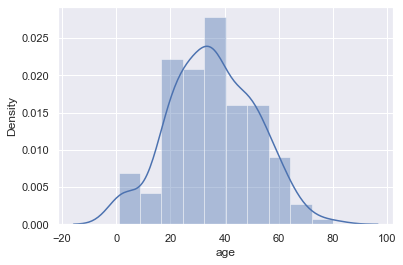

In [39]:
copy = train_df.copy()
copy.dropna(inplace = True)
sns.distplot(copy["age"]);

In [41]:
train_df["age"].fillna(train_df["age"].median(), inplace = True)

train_df["embarked"].fillna("S", inplace = True)



In [47]:
train_df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [48]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [49]:
from sklearn.metrics import make_scorer, accuracy_score 

In [50]:
train_df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [52]:
features = ["pclass", 'sex', "age", "embarked", "fare", "alone" ]
X_train = train_df[features] 
y_train = train_df["survived"] 


In [53]:
from sklearn.model_selection import train_test_split

X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0) 

In [60]:
train_df.loc[train_df["sex"] == "male", "Sex"] = 0
train_df.loc[train_df["sex"] == "female", "Sex"] = 1
train_df.loc[train_df["embarked"] == "S", "embarked"] = 0
train_df.loc[train_df["embarked"] == "C", "embarked"] = 1
train_df.loc[train_df["embarked"] == "Q", "embarked"] = 2

In [1]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_training, y_training)
pred_knn = knn_clf.predict(X_valid)
acc_knn = accuracy_score(y_valid, pred_knn)

print(acc_knn)

NameError: name 'KNeighborsClassifier' is not defined